# Decison Tree 

In [42]:
# import the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import warnings

warnings.filterwarnings('ignore')

In [43]:
# load the cleaned dataset
df_census = pd.read_csv("../Data/cleaned_census.csv")
df_census.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
# get info on the data 
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 94 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education-num                               32561 non-null  int64
 3   capital-gain                                32561 non-null  int64
 4   capital-loss                                32561 non-null  int64
 5   hours-per-week                              32561 non-null  int64
 6   workclass_ ?                                32561 non-null  int64
 7   workclass_ Federal-gov                      32561 non-null  int64
 8   workclass_ Local-gov                        32561 non-null  int64
 9   workclass_ Never-worked                     32561 non-null  int64
 10  workclass_ Private                

I find a number of columns having a `?` at the end. Let us delete those columns from the data.

In [45]:
drop_col = df_census.filter(regex=r"\?$").columns
df_census.drop(labels=drop_col, axis=1, inplace=True)
df_census.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupatio

The target is to know whether some person is making 50K. Thus either of the columns `income_ <=50K` or `income_ >50K` will do! Thus we can drop any one!

In [46]:
df_census.drop(labels=['income_ <=50K'], axis=1, inplace=True)
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 90 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education-num                               32561 non-null  int64
 3   capital-gain                                32561 non-null  int64
 4   capital-loss                                32561 non-null  int64
 5   hours-per-week                              32561 non-null  int64
 6   workclass_ Federal-gov                      32561 non-null  int64
 7   workclass_ Local-gov                        32561 non-null  int64
 8   workclass_ Never-worked                     32561 non-null  int64
 9   workclass_ Private                          32561 non-null  int64
 10  workclass_ Self-emp-inc           

In [47]:
# let us now separate the predictor columns and the target column 
X = df_census.iloc[:,:-1] # all columns except the last one 
y = df_census.iloc[:,-1] # the last column is the target 

In [48]:
# let us split the data in train and test set
from sklearn.model_selection import train_test_split

# the train and the test set - by default the test size is 0.25
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.25,
                                                    random_state=2)

In [49]:
# let us check the shape 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24420, 89), (8141, 89), (24420,), (8141,))

In [50]:
# let us fit the Decison Tree Classifier Model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# initiate the model 
clf = DecisionTreeClassifier(random_state=2)

# fit the model 
clf.fit(X_train, y_train)

# make predictins for the test set
y_pred = clf.predict(X_test)

# compare the actual and the predicted
accuracy_score(y_pred=y_pred, y_true=y_test)

0.8129222454243951

So, we find that the Decision Tree Classifier Model has achieved an accuracy of 81%! 

**NOTE**

Let me explain how accuracy is calculated for a classifier. 

Accuracy is one of the most straightforward metrics - it's simply the ratio of correct predictions to total predictions:

```
Accuracy = (True Positives + True Negatives) / (Total Number of Cases)
```

For example, if you have a binary classifier:
- True Positives (TP): Cases correctly predicted as positive
- True Negatives (TN): Cases correctly predicted as negative 
- False Positives (FP): Cases incorrectly predicted as positive
- False Negatives (FN): Cases incorrectly predicted as negative

Then accuracy would be:
```
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```

While accuracy is intuitive, it can be misleading with imbalanced datasets. For instance, if you have a dataset where 95% of cases are negative, a classifier could achieve 95% accuracy by simply predicting "negative" for everything - which isn't very useful.

That's why accuracy is usually considered alongside other metrics like:
- Precision: TP / (TP + FP)
- Recall: TP / (TP + FN) 
- F1 Score: Harmonic mean of precision and recall

In [51]:
clf.classes_

array([0, 1])

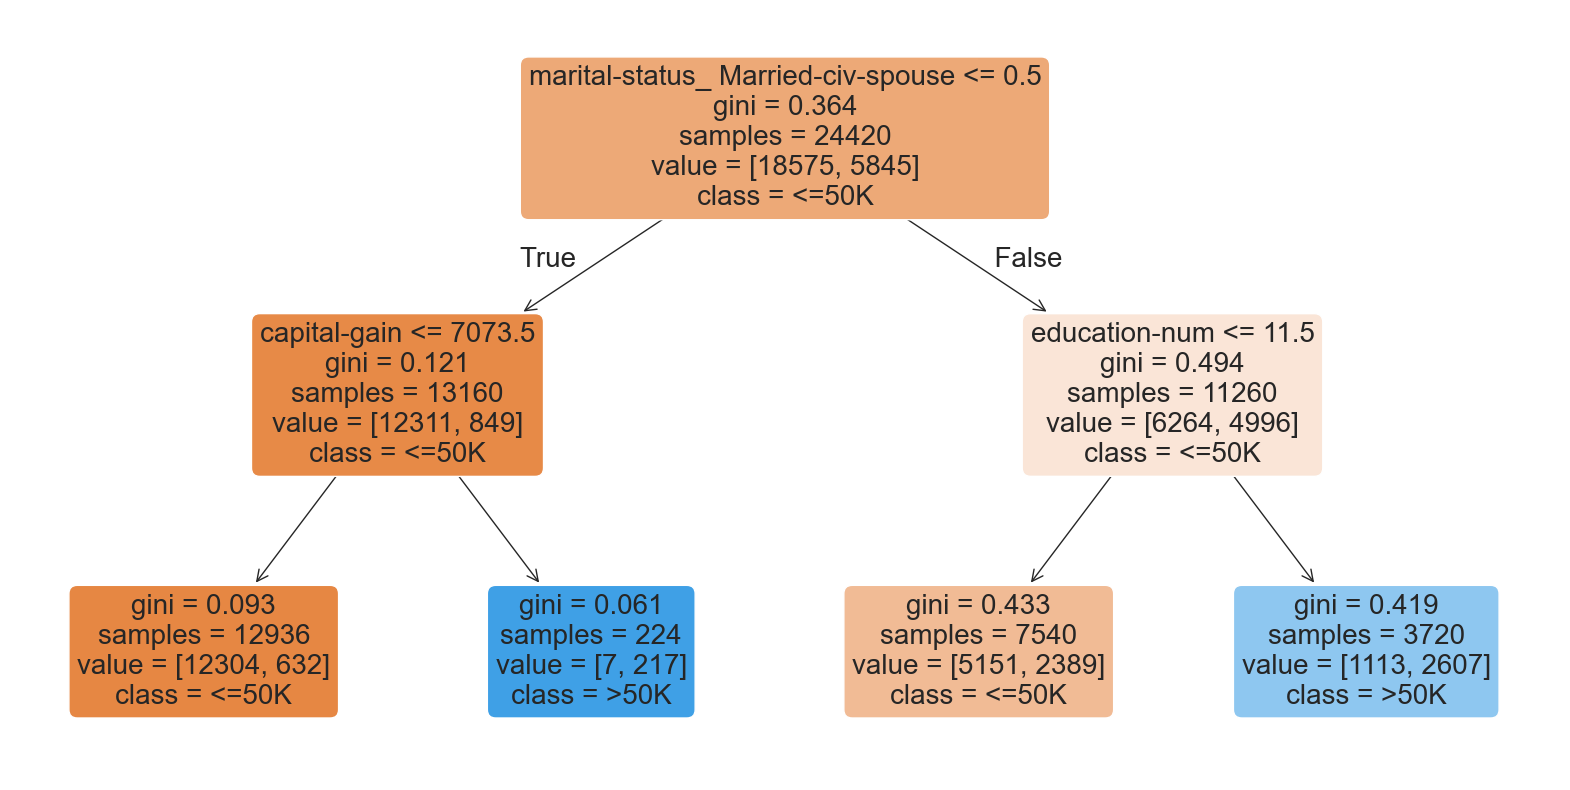

In [52]:
# let us now try to visualize the tree 
from sklearn.tree import plot_tree

# create and fit the decision tree , keeping the max_depth low so that it is easy to visualize the tree formed 
clf_plot = DecisionTreeClassifier(random_state=2, max_depth=2)
clf_plot.fit(X_train, y_train)

# Create the visualization
plt.figure(figsize=(20,10))
plot_tree(clf_plot, 
          feature_names=X_train.columns,  # Replace with your feature names
          class_names=['<=50K','>50K'],  # Class names if you have them
          filled=True,              # Color nodes by class
          rounded=True,             # Round edges
          fontsize=20)              

# Show the plot
plt.show()

Here is a complete analysis of all nodes and leaves of the decision tree in tabular format:

---

### **Explanation of Node Components**
Each node contains the following:
- **Feature**: The variable used for the split (e.g., `marital-status_Married-civ-spouse`).
- **Threshold**: The value used to split the data (e.g., `<= 0.5`).
- **Gini**: The Gini impurity of the node.
>- Gini impurity is a measure of the probability of misclassifying a randomly chosen element from a node if it's labeled according to the distribution of labels in that node.

🟢 **Bote on Ginni Impurity:**
| Gini Value | Node Type         | Meaning                     |
|------------|-------------------|-----------------------------|
| 0.0        | Pure node         | All samples are of one class |
| 0.5 (max)  | Binary, 50-50 mix | Perfectly impure (equal mix) |
| Closer to 0 | Less impurity    | Easier to classify           |


- **Samples**: The number of samples in the node.
- **Value**: The distribution of samples in different classes (e.g., `[18575, 5845]`).
- **Class**: The class with the majority of samples in the node (e.g., `<=50K`).

---


This is a **decision tree visualization** that uses the **Gini impurity** criterion to split the data. Let’s break it down step by step.

---

## **🛠 Understanding the Tree Structure**
Each node represents a decision rule that splits the data based on a feature.

- **Root Node (Top Node)**  
  - Splits on `marital-status_Married-civ-spouse <= 0.5`
  - **Gini Impurity:** 0.364  
  - **Samples:** 24,420  
  - **Value:** [18,575 (<=50K), 5,845 (>50K)]  
  - Majority class: **<=50K**

This means:
- If **True** (left branch): The person is **not married-civ-spouse**.
- If **False** (right branch): The person is **married-civ-spouse**.

---

## **🔍 Left Subtree (True Branch)**
- The next split happens on **capital-gain <= 7073.5**
  - **Gini = 0.121** (Low impurity, meaning most samples belong to one class)
  - **Samples = 13,160**
  - **Value = [12,311, 849]** (Mostly **<=50K**)

  - **Left child:**  
    - Gini = 0.093 (Even purer, mostly <=50K)
    - Samples = 12,936
    - Value = [12,304, 632]  
  - **Right child:**  
    - Gini = 0.061 (Very pure, mostly >50K)
    - Samples = 224
    - Value = [7, 217]  
    - Majority class: **>50K**

---

## **🔍 Right Subtree (False Branch)**
- The split happens on **education-num <= 11.5**
  - **Gini = 0.494** (High impurity, almost equal classes)
  - **Samples = 11,260**
  - **Value = [6,264, 4,996]** (More mixed than the left side)

  - **Left child:**  
    - Gini = 0.433
    - Samples = 7,540
    - Value = [5,151, 2,389] (Mostly **<=50K**)
  - **Right child:**  
    - Gini = 0.419
    - Samples = 3,720
    - Value = [1,113, 2,607] (Mostly **>50K**)

---

## **📌 Key Takeaways**
1. **Gini impurity is used to measure purity.**  
   - A value closer to **0** → purer (better separation).
   - A value closer to **0.5** → more mixed (harder to classify).

2. **The tree first splits on marital status, then capital-gain & education.**  
   - People **not married** tend to earn **<=50K**.
   - People **with high capital-gain** tend to earn **>50K**.
   - Higher education (education-num > 11.5) increases the chance of earning **>50K**.

3. **Leaves (bottom nodes) have low Gini impurity, meaning they are mostly pure.**  
   - The lowest impurity node (Gini = 0.061) contains **mostly >50K** individuals.
   - The node with **Gini = 0.093** contains almost entirely **<=50K** earners.

---

## **🚀 Conclusion**
This decision tree is used to predict **income (<=50K or >50K)** based on features like **marital status, capital gain, and education**. The model learns **patterns in the data** to classify new observations efficiently.

## Tuning Hyperparameters of Decision Tree

### **🔹 What Does `cross_val_score` Do?**  
It **splits** the dataset into **K folds** (default is 5), trains the model on **K-1 folds**, and **tests it on the remaining fold**. This process is repeated K times, and the function returns an **array of scores** (one for each fold).  

#### **📌 Syntax**
```python
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
```
- `model`: The machine learning model (e.g., `DecisionTreeClassifier()`)
- `X`: Features (independent variables)
- `y`: Target (dependent variable)
- `cv`: Number of folds (default = 5)
- `scoring`: Metric to evaluate (e.g., `'accuracy'`, `'roc_auc'`, `'f1'`)

---

#### **🔹 How Does It Work?**
If `cv=5`, `cross_val_score` performs:
1. **Split Data:** The dataset is split into **5 subsets (folds)**.
2. **Train/Test Loop:** The model is trained on 4 subsets and tested on the remaining one. This is repeated 5 times.
3. **Compute Scores:** Accuracy (or other metric) is calculated for each fold.
4. **Return Scores:** An array of scores `[0.95, 0.97, 0.96, 0.94, 0.98]` is returned.

---

#### **🔹 Why Use `cross_val_score`?**
✅ **Prevents Overfitting:** Unlike a single train-test split, it evaluates on different subsets.  
✅ **More Reliable Performance Estimate:** Averages scores across multiple test sets.  
✅ **No Need for Manual Train-Test Splitting:** Handles it automatically. 

---
#### Important NOTE on `cross_val_score`

When you're using **stratified cross-validation** (which is default for classification problems), the data is split **in a way that preserves the class distribution** in each fold.

But — if you have **very few samples in one class**, and you're asking for more folds than there are samples in that class, Python throws this error.

**Example:**

- Suppose you have:
  - Class A: 50 samples
  - Class B: **3 samples**

If you try:
```python
cross_val_score(model, X, y, cv=5)
```
❌ Error!  
Because with `cv=5`, every fold needs at least 1 sample from **each class**, but class B has only 3 samples.

##### ✅ **Solutions**

##### 1. **Lower the number of splits (`cv`)**
Check the smallest class count and make sure `cv <= min(class counts)`

```python
cross_val_score(model, X, y, cv=3)
```

##### 2. **Use `StratifiedKFold` with `shuffle=True`**
You can shuffle before splitting to balance folds a bit better (but you still need to check class counts).

```python
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cross_val_score(model, X, y, cv=cv)
```

##### 3. **Check your data distribution!**
It’s always a good idea to check:

```python
import numpy as np
np.bincount(y)  # if y is encoded as 0, 1
```

or if you're using Pandas:

```python
import pandas as pd
pd.Series(y).value_counts()
```

---

In [82]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor

# import dataset
df_bikes = pd.read_csv('../Data/bike_rental_cleaned.csv')
X = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

# create the model
reg = DecisionTreeRegressor(random_state=2)

# fit the model using cross_val_score 
scores = cross_val_score(estimator=reg,
                         X=X_train,
                         y=y_train,
                         scoring='neg_mean_squared_error',
                         cv=5)
print(scores)

# calculate rmse 
rmse = np.sqrt(-scores)
print('RMSE mean: %0.2f' % (rmse.mean()))

[-1040392.60683761  -772704.04273504 -1040143.03418803 -1216631.04273504
  -650193.8362069 ]
RMSE mean: 965.65


In [84]:
# let us fit a simple linear regression and check rmse 
# fit the model using cross_val_score 
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

scores = cross_val_score(estimator=reg,
                         X=X_train,
                         y=y_train,
                         scoring='neg_mean_squared_error',
                         cv=5)
print(scores)

# calculate rmse 
rmse = np.sqrt(-scores)
print('RMSE mean: %0.2f' % (rmse.mean()))

[ -847822.01771182  -672510.32896395  -942461.5750607  -1041485.90155997
  -596321.4223678 ]
RMSE mean: 900.88


The `RMSE` is 965.65 from `DecisionTreeRegressor`.  This is worse than the  900.88 obtained from `Linear Regression`!

**Question:** Is the model overfitting the data because the variance is too high?

In [85]:
# let us now fir the model on the train set and look at rmse 
reg = DecisionTreeRegressor(random_state=2)

# fit the model
reg.fit(X_train, y_train)

# predict 
y_pred = reg.predict(X_train)

# calculate rmse 
from sklearn.metrics import root_mean_squared_error

reg_rmse = root_mean_squared_error(y_true=y_train, y_pred=y_pred)
reg_rmse

0.0

A `RMSE` of 0.0 means that the model has perfectly fit every data point! This
perfect score combined with a cross-validation error of 965.65 is proof that
the decision tree is overfitting the data with high variance. The training set fit
perfectly, but the test set missed badly.

Hyperparameters may rectify the situation.

  Let’s go through the hyperparameters of **`DecisionTreeRegressor`** in **Scikit-Learn**.

These hyperparameters control:
- ✅ Tree depth
- ✅ Splitting rules
- ✅ Minimum samples per leaf
- ✅ Regularization
- ✅ And randomness

---

### 🔥 **Most Important Hyperparameters of `DecisionTreeRegressor`**

| Hyperparameter               | What It Does | Example Value |
|-----------------------------|-------------|--------------|
| **`criterion`**               | Function to measure the quality of a split. | `'squared_error'` (default), `'friedman_mse'`, `'absolute_error'`, `'poisson'` |
| **`max_depth`**               | Maximum depth of the tree. Controls overfitting. | `None` (default), `3`, `5`, etc. |
| **`min_samples_split`**       | Minimum samples required to split an internal node. | `2` (default), or e.g. `5`, `10` |
| **`min_samples_leaf`**        | Minimum samples required to be at a leaf node. Helps control overfitting. | `1` (default), or e.g. `2`, `5` |
| **`max_features`**            | Number of features to consider when looking for best split. | `None`, `'sqrt'`, `'log2'`, or float (like `0.5`) |
| **`max_leaf_nodes`**          | Grow tree with max number of leaf nodes. | `None`, `10`, `20` |
| **`min_weight_fraction_leaf`** | Minimum weighted fraction of total samples at a leaf node. | `0.0` (default) |
| **`random_state`**            | Controls randomness of estimator. Good for reproducibility. | `42`, `0`, etc. |
| **`splitter`**                | Strategy to choose the split at each node. | `'best'` (default), `'random'` |
| **`ccp_alpha`**               | Complexity parameter for Minimal Cost-Complexity Pruning. Higher values prune more. | `0.0` (default), try tuning! |

---

### 🚀 **Example in code:**
```python
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
```

---

### 🧩 **Quick Tips:**
- 📏 `max_depth`: Controls how "deep" the tree grows. Deeper trees = more complexity.
- 🧹 `min_samples_leaf` & `min_samples_split`: Help in reducing overfitting.
- ✂️ `ccp_alpha`: Helps prune the tree and simplify it.
- 🎲 `random_state`: Always set for reproducibility!

---

### `max_depth`

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2,3,4,6,8,10,20,None]
}

reg = DecisionTreeRegressor(random_state=2)

grid_reg = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # For regression tasks
    n_jobs=-1
)

grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6, 8, 10, 20, None]},
             scoring='neg_mean_squared_error')

In [87]:
grid_reg.best_estimator_

DecisionTreeRegressor(max_depth=6, random_state=2)

In [88]:
grid_reg.best_params_

{'max_depth': 6}

In [91]:
best_score = np.sqrt(-grid_reg.best_score_)
print(f"Training Score : {best_score:.2f}")

Training Score : 911.50


In [92]:
# let us now use the test set and predict and get the score 
best_model = grid_reg.best_estimator_

# predict 
y_pred = best_model.predict(X_test)

rmse_test = root_mean_squared_error(y_pred=y_pred,
                                    y_true=y_test)

print(f"test score : {rmse_test}")

test score : 897.4452250976258


As is visible, the variance has been substantially reduced!

### `min_samples_leaf`

In [113]:
param_grid = {
    'min_samples_leaf': np.arange(1,10)
}

reg = DecisionTreeRegressor(random_state=2)

grid_reg = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # For regression tasks
    n_jobs=-1
)

grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2), n_jobs=-1,
             param_grid={'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error')

In [114]:
best_score = np.sqrt(-grid_reg.best_score_)
print(f"Training Score : {best_score:.2f}")

Training Score : 862.32


In [115]:
# let us now use the test set and predict and get the score 
from sklearn.metrics import mean_squared_error

best_model = grid_reg.best_estimator_

# predict 
y_pred = best_model.predict(X_test)

rmse_test = mean_squared_error(y_pred=y_pred,
                                    y_true=y_test)**0.5

print(f"Test score : {rmse_test:.2f}")

Test score : 842.76


Over here, as is vsisble, the variance has reduced too!

### `max_depth` and `min_samples_leaf`

**TIP**

This is a valuable lesson in hyperparameter tuning: Hyperparameters should not
be chosen in isolation.

In [116]:
param_grid = {
    'max_depth': np.arange(1,10),
    'min_samples_leaf': np.arange(1,10)
    }

reg = DecisionTreeRegressor(random_state=2)

grid_reg = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # For regression tasks
    n_jobs=-1
)

grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error')

In [117]:
best_score = np.sqrt(-grid_reg.best_score_)
print(f"Training Score : {best_score:.2f}")

Training Score : 856.29


In [118]:
from sklearn.metrics import mean_squared_error

best_model = grid_reg.best_estimator_

# predict 
y_pred = best_model.predict(X_test)

rmse_test = mean_squared_error(y_pred=y_pred,
                                    y_true=y_test)**0.5

print(f"Test score : {rmse_test:.2f}")

Test score : 847.35


  There’s a **very good general rule of thumb** when it comes to tuning hyperparameters, especially for tree-based models like **DecisionTreeRegressor** or **DecisionTreeClassifier**.

Let’s unpack this rule properly:

---

### 🌳 General Rule of Thumb

✅ **Reduce "max" hyperparameters to prevent overfitting.**  
✅ **Increase "min" hyperparameters to control splits and complexity.**

### 🧩 **So your rule is like this:**

> ✅ **Decrease**: `max_depth`, `max_leaf_nodes`, `max_features`  
> ✅ **Increase**: `min_samples_split`, `min_samples_leaf`, `ccp_alpha`

This makes the tree **simpler**, avoids **overfitting**, and improves **generalization** — especially important for small datasets or noisy data!

---

### 🎯 **When to break the rule?**
- If your model is **underfitting** (high bias), you may want to:
  - Increase `max_depth`
  - Decrease `min_samples_split`, `min_samples_leaf`
- But always start small and increase complexity **only if needed**.

---

In [120]:
# Hyperparameter grid
param_grid = {
    'max_depth': np.arange(1,10),
    'min_samples_split': np.arange(2,10),
    'min_samples_leaf': np.arange(1,10),
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1],
    'splitter':['random'], # Changing splitter to 'random' is a great way to prevent overfitting and diversify trees.
    'min_impurity_decrease': [0.0, 0.01, 0.1], # A node will be split only if it decreases impurity by at least this value. ✅ Higher value → fewer splits → simpler tree.
}

Let’s go deeper into **`ccp_alpha`** — this is a very useful but often confusing hyperparameter.  

It controls **pruning** in Decision Trees.

---

### 🌳 **What is `ccp_alpha`?**

- **Full name:** *Cost Complexity Pruning Alpha*
- This is about **pruning** the tree **after** it’s fully grown.
- Decision Trees naturally tend to **overfit** by splitting until leaves are pure.
- `ccp_alpha` adds a penalty for having more leaf nodes.

> **The higher the `ccp_alpha`, the more you prune.**

The formula it uses:
```
Rα(T) = R(T) + α * |T|
```
Where:
- `R(T)` = total impurity of the tree (Gini or MSE sum)
- `|T|` = number of terminal nodes (leaves)
- `α (ccp_alpha)` = complexity parameter

---

### 🎨 **Simple Explanation**

| `ccp_alpha` Value | Behavior |
|------------------|-----------|
| `0.0`            | No pruning, full tree (may overfit) 🌳 |
| `0.01`           | Moderate pruning ✂️ |
| `0.1`            | Aggressive pruning, fewer splits 🪓 |

---

### ⚙️ **When to use:**

- **Small datasets:** Helps avoid overfitting.
- **Noisy data:** Simplifies tree, more generalization.
- **Large trees:** Reduces complexity for better performance.

---

### 🧩 **In Hyperparameter Tuning**

When you include `ccp_alpha` in `GridSearchCV`, you test different pruning strengths:

```python
param_grid = {
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1],
    # other params...
}
```

This lets you balance:
- **Too small:** Overfitting
- **Too big:** Underfitting

---

### 🚀 **Bonus Tip: How to automatically find `ccp_alpha` values**

Scikit-learn has a neat method:
```python
path = DecisionTreeRegressor(random_state=42).cost_complexity_pruning_path(X_train, y_train)
print(path.ccp_alphas)
```

This will give you a list of meaningful `ccp_alpha` values based on your data!

---

### ✅ **Summary**
- `ccp_alpha` = Pruning parameter
- Higher → simpler tree
- Always good to tune it with GridSearchCV!

---

In [121]:
reg = DecisionTreeRegressor(random_state=2)

grid_reg = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # For regression tasks
    n_jobs=-1
)

grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.0, 0.01, 0.1],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['random']},
             scoring='neg_mean_squared_error')

In [123]:
grid_reg.best_params_

{'ccp_alpha': 0.0,
 'max_depth': np.int64(9),
 'max_features': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': np.int64(1),
 'min_samples_split': np.int64(3),
 'splitter': 'random'}

In [122]:
best_score = np.sqrt(-grid_reg.best_score_)
print(f"Training Score : {best_score:.2f}")

Training Score : 797.47


In [124]:
from sklearn.metrics import root_mean_squared_error

best_model = grid_reg.best_estimator_

# predict 
y_pred = best_model.predict(X_test)

rmse_test = root_mean_squared_error(y_pred=y_pred,
                                    y_true=y_test)
print(f"Test score : {rmse_test:.2f}")

Test score : 793.23


The variation , now , is very small for the test set. Hence, we can say that the variation has decreased a lot. Thus, there is no overfitting. 